In [17]:
from mnist_test.mnist_vae import MnistVAE

import torch
import torch.nn.functional as F
from torchvision import datasets, transforms

import matplotlib.pyplot as plt

In [18]:
CHK_PT = "/home/kieran/Level5ProjectAudioVAE/mnist_test/l5proj_spectrogram_vae/o0am7ssa/checkpoints/epoch=48-step=91875.ckpt"

In [19]:
model = MnistVAE.load_from_checkpoint(CHK_PT)

In [20]:
test_dataset = datasets.MNIST(root='./mnist_data/', train=False, transform=transforms.ToTensor(), download=False)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=1, shuffle=False, num_workers=4)

In [21]:
# NUM_EXAMPLES=1
#
# # fig, axes = plt.subplots(NUM_EXAMPLES, 2, figsize=(8,5))
#
# for i, spc in enumerate(test_loader):
#     if i >= NUM_EXAMPLES:
#         break
#
#     x, _ = spc
#     print(x)
#     #
#     # print(x)
#
#     x_hat, _, _ = model(x)
#
#     print(x_hat)

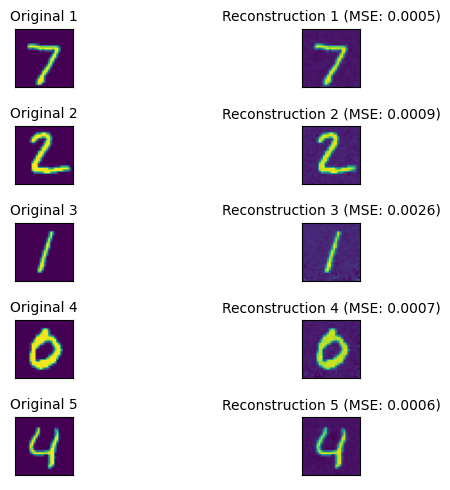

In [22]:
NUM_EXAMPLES=5

fig, axes = plt.subplots(NUM_EXAMPLES, 2, figsize=(8,5))

for i, spc in enumerate(test_loader):
    if i >= NUM_EXAMPLES:
        break

    x, _ = spc
    x_hat, _, _ = model(x)

    mse = F.mse_loss(x, x_hat)

    ax1 = axes[i, 0].imshow(x.squeeze().numpy())
    ax2 = axes[i, 1].imshow(x_hat.detach().squeeze().numpy())

    axes[i, 0].set_title(f"Original {i+1}", fontsize=10)
    axes[i, 1].set_title(f"Reconstruction {i+1} (MSE: {mse.item():.4f})", fontsize=10)

    axes[i, 0].set_xticks([])
    axes[i, 0].set_yticks([])

    axes[i, 1].set_xticks([])
    axes[i, 1].set_yticks([])

plt.tight_layout()
plt.savefig("./figures/mnist_reconstruction_no_kld.svg")